In [2]:
#importing sklearn
import sklearn
# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures in jupyter notebooks
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
#getting data from csv
house = pd.read_csv('C:/Users/HP/Documents/GitHub/Housing_Price_Prediction/housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
house["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


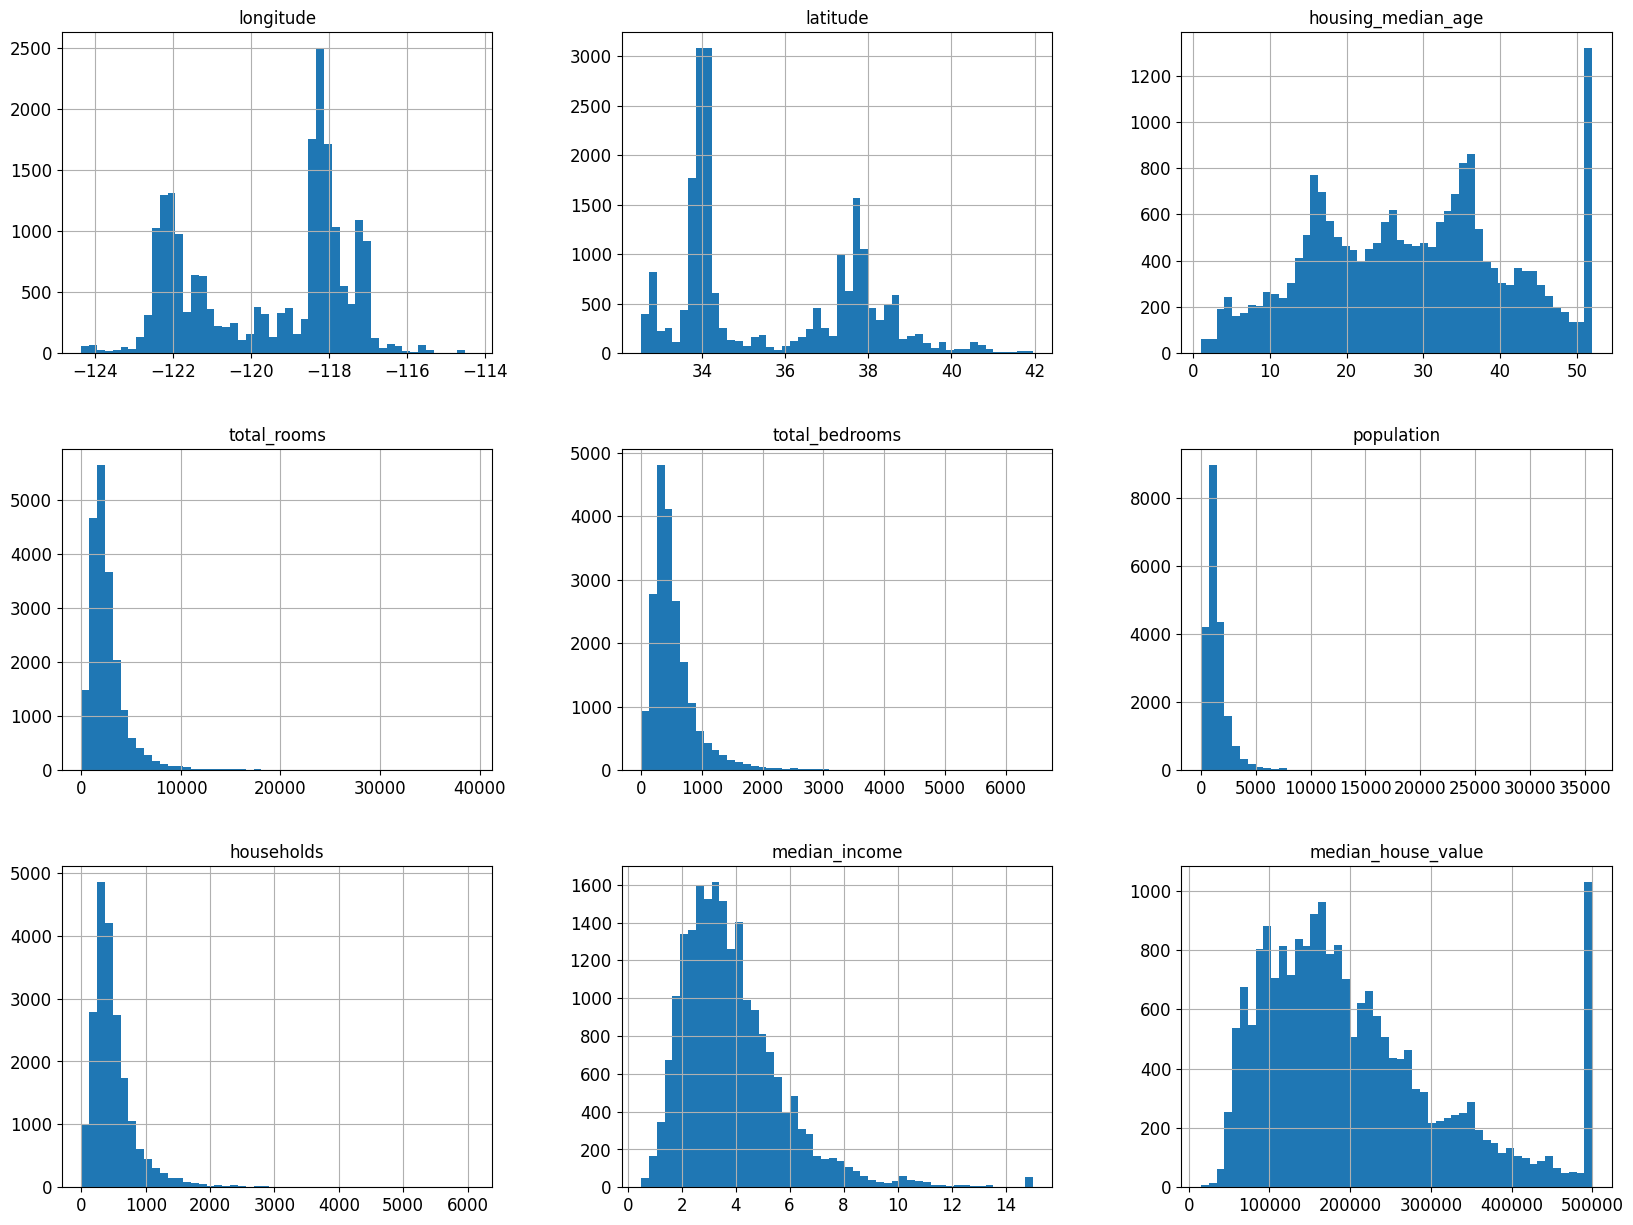

In [10]:
#plotting histogram
house.hist(bins=50, figsize=(20,15))
plt.show();

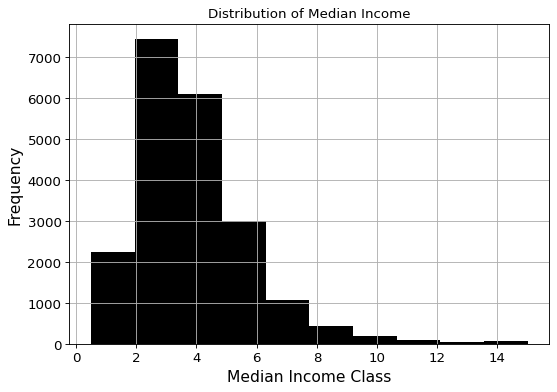

In [11]:
fig = plt.figure(dpi = 80, figsize = (6,4))
ax = fig.add_axes([1,1,1,1])
ax.set(xlabel = 'Median Income Class',ylabel = 'Frequency',title = 'Distribution of Median Income')
house["median_income"].hist(color='black',ax = ax)
plt.show()

In [12]:
house["income_cat"] = pd.cut(house["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [13]:
house["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

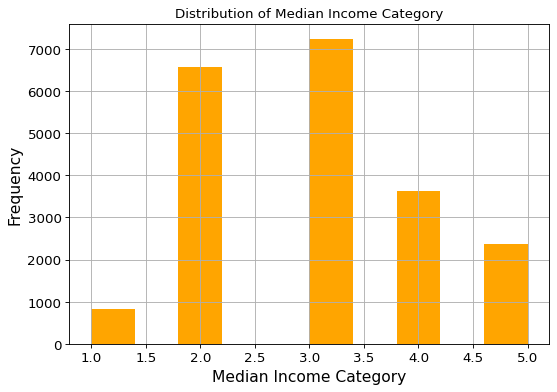

In [14]:
fig = plt.figure(dpi = 80, figsize = (6,4))
ax = fig.add_axes([1,1,1,1])
ax.set(xlabel = 'Median Income Category',ylabel = 'Frequency',title = 'Distribution of Median Income Category')
house["income_cat"].hist(color = 'orange',ax=ax)
plt.show()

In [15]:
# Importing and Using Stratified shuffle split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(house, house["income_cat"]):
    strat_train_set = house.loc[train_index]
    strat_test_set = house.loc[test_index]

In [16]:
house = strat_train_set.copy()

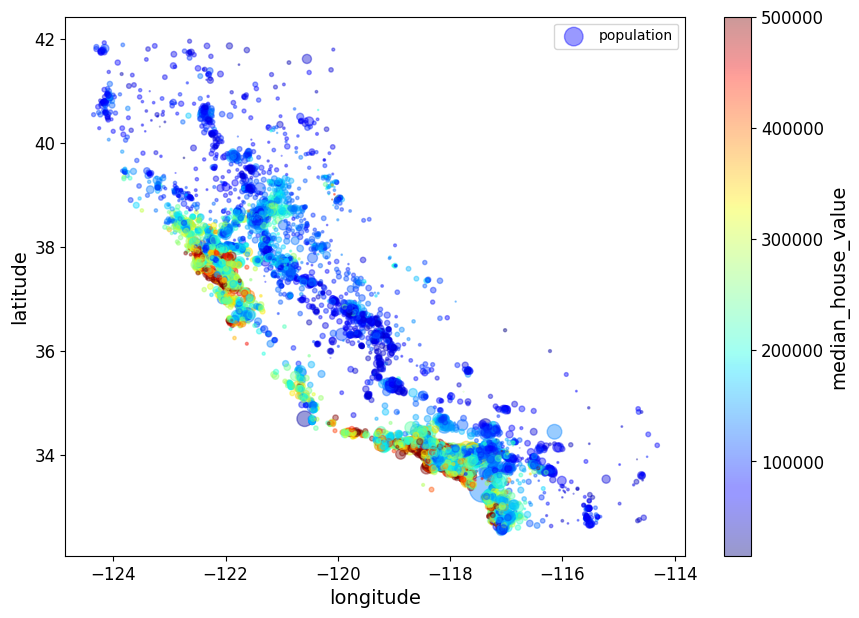

In [17]:
house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=house["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

> This image tells that the housing price is very much related to the location and to the population density.

In [24]:
print(house.dtypes)


longitude                    float64
latitude                     float64
housing_median_age           float64
total_rooms                  float64
total_bedrooms               float64
population                   float64
households                   float64
median_income                float64
median_house_value           float64
ocean_proximity               object
income_cat                  category
rooms_per_household          float64
bedrooms_per_room            float64
population_per_household     float64
dtype: object


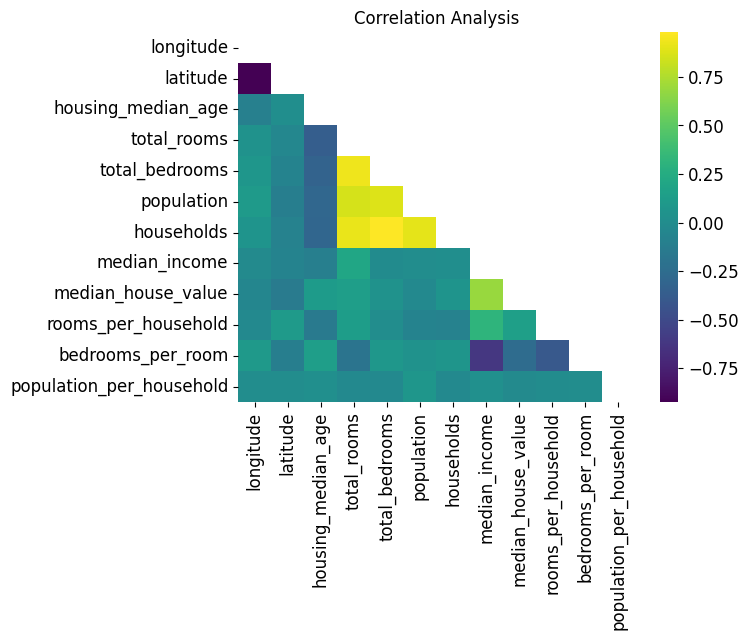

In [25]:
corr = house.select_dtypes(include=['number']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr, mask=mask, annot=False, lw=0, linecolor='white', cmap='viridis', fmt="0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

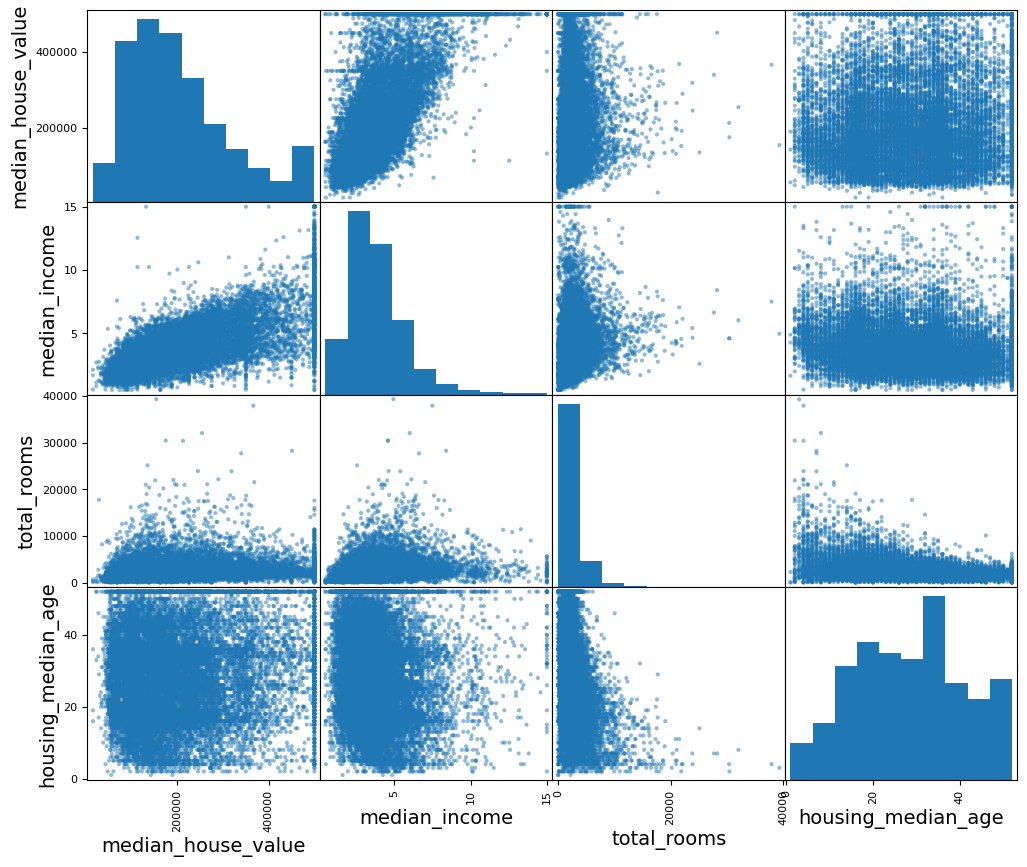

In [20]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(house[attributes], figsize=(12, 10))
plt.show()

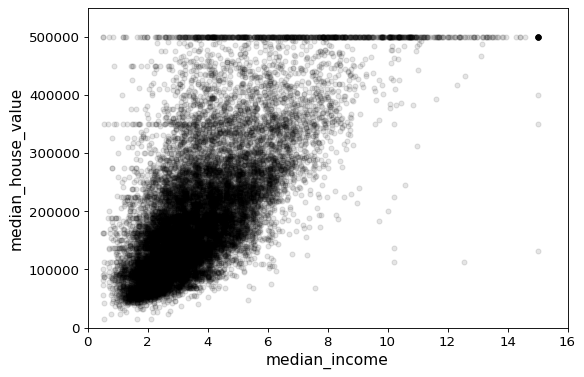

In [21]:
#The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot
fig = plt.figure(dpi = 80, figsize = (6,4))
ax = fig.add_axes([1,1,1,1])

house.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1,color = 'black',ax=ax)
plt.axis([0, 16, 0, 550000])
plt.show()

In [22]:
house["rooms_per_household"] = house["total_rooms"]/house["households"]
house["bedrooms_per_room"] = house["total_bedrooms"]/house["total_rooms"]
house["population_per_household"]=house["population"]/house["households"]

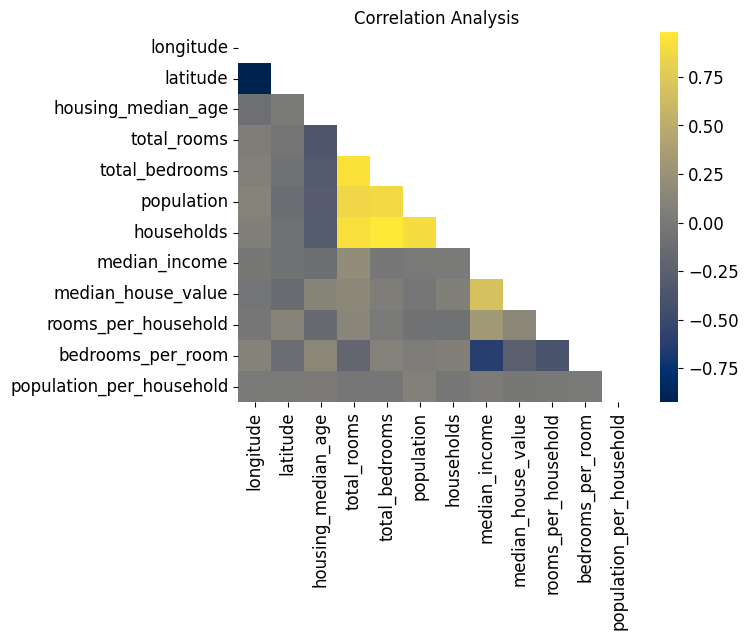

In [26]:
corr = house.select_dtypes(include=['number']).corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=False,lw=0,linecolor='white',cmap='cividis',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()